In [1]:
import pandas as pd
rate_data = pd.read_csv("./신용등급예측 데이터(샘플 3).csv")

In [2]:
rate_data.head()

,신용평점,최대주주지분율(단위:%),유동비율,부채비율,영업이익이자보상비율,매출액순이익율,자기자본순이익율,매출액영업이익율,매출채권회전율,재고자산회전율,매출액증가율,베타,종업원수,인건비
0,0,21.9,110.98,54.33,4.98,1.99,1.72,15.69,2.68,5.45,14.40,1.7815,198,3.490181e+09
1,1,20.0,53.90,135.89,-1.67,-5.69,-8.25,-5.39,3.17,13.09,-17.13,0.9807,347,8.223069e+09
2,0,32.0,287.03,29.19,94.90,14.67,19.69,17.20,9.26,5.45,22.64,1.0491,136,2.664518e+09
3,1,33.6,62.12,157.56,-1.26,-2.24,-3.02,-2.97,2.54,9.27,-6.92,0.9493,203,3.734113e+09
4,1,26.1,174.10,357.12,1.01,0.22,0.63,3.86,4.42,9.62,-30.63,1.0279,3412,6.399200e+10


In [3]:
rate_data.columns

Index(['신용평점', '최대주주지분율(단위:%)', '유동비율', '부채비율', '영업이익이자보상비율', '매출액순이익율',
       '자기자본순이익율', '매출액영업이익율', '매출채권회전율', '재고자산회전율', '매출액증가율', '베타', '종업원수',
       '인건비'],
      dtype='object')

In [4]:
rate_data.isnull().sum()

신용평점             0
최대주주지분율(단위:%)    0
유동비율             0
부채비율             0
영업이익이자보상비율       0
매출액순이익율          0
자기자본순이익율         0
매출액영업이익율         0
매출채권회전율          0
재고자산회전율          0
매출액증가율           0
베타               0
종업원수             0
인건비              0
dtype: int64

In [5]:
# 결정트리 알고리즘 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
dt_clf = DecisionTreeClassifier(random_state = 1206)

X = rate_data.drop(['신용평점'], axis = 1)
y = rate_data['신용평점'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1206)

In [7]:
str(dt_clf.classes_)

'[0 1]'

In [8]:
dt_clf.feature_names_in_

array(['최대주주지분율(단위:%)', '유동비율', '부채비율', '영업이익이자보상비율', '매출액순이익율',
       '자기자본순이익율', '매출액영업이익율', '매출채권회전율', '재고자산회전율', '매출액증가율', '베타',
       '종업원수', '인건비'], dtype=object)

In [9]:
import numpy as np

# graphviz를 이용하기 위한 sklearn 모듈 안의 export_graphviz 사용
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = str(dt_clf.classes_), feature_names = dt_clf.feature_names_in_, impurity = True, filled = True)

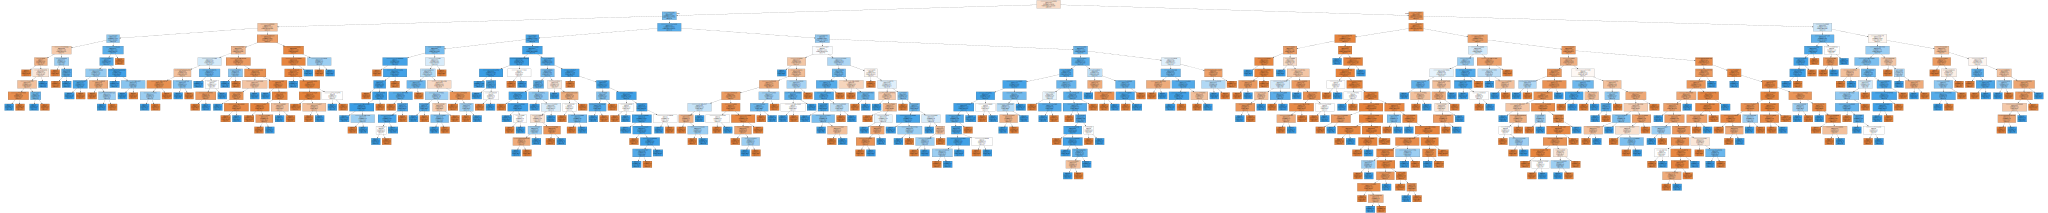

In [10]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.026 0.024 0.199 0.498 0.053 0.031 0.023 0.031 0.035 0.017 0.015 0.027
 0.021]
최대주주지분율(단위:%) : 0.026366
유동비율 : 0.023509
부채비율 : 0.198689
영업이익이자보상비율 : 0.498232
매출액순이익율 : 0.052931
자기자본순이익율 : 0.031407
매출액영업이익율 : 0.022869
매출채권회전율 : 0.030774
재고자산회전율 : 0.035051
매출액증가율 : 0.016987
베타 : 0.014842
종업원수 : 0.026980
인건비 : 0.021363


<AxesSubplot:>

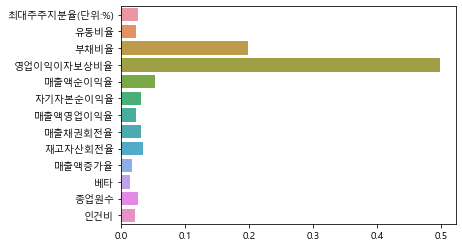

In [11]:
# dt_clf에서 feature_importances_를 가져와서 피쳐중요도 확인하기
import matplotlib as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# feature_importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X.columns, dt_clf.feature_importances_):
  print('{0} : {1:3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = dt_clf.feature_names_in_)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정트리 예측 정확도: {0:.4f}".format(accuracy))

print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정트리 예측 정확도: 0.8488
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8735
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [14]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.871669
1,8,0.873529
2,10,0.872911
3,12,0.870431
4,16,0.868778
5,20,0.868778
6,24,0.868778


In [15]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8851
max_depth = 8 정확도: 0.8661
max_depth = 10 정확도: 0.8562
max_depth = 12 정확도: 0.8496
max_depth = 16 정확도: 0.8479
max_depth = 20 정확도: 0.8504
max_depth = 24 정확도: 0.8504


In [16]:
params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 최고 평균 정확도 수치: 0.8735
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [17]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정트리 예측 정확도:{0:.4f}'.format(accuracy))

결정트리 예측 정확도:0.8661


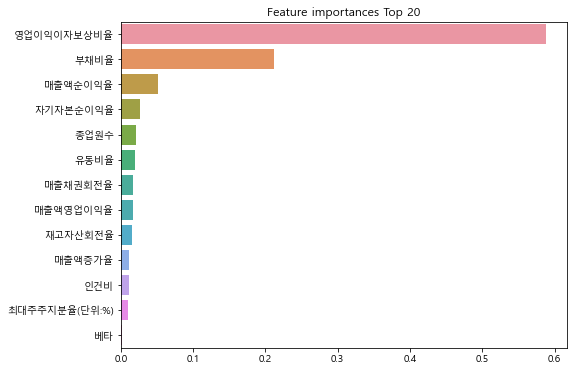

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

In [19]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN',knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.5636
LogisticRegression 정확도: 0.5752
KNeighborsClassifier 정확도: 0.5628


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [22]:
X = rate_data.drop(['신용평점'], axis = 1)
y = rate_data['신용평점'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8942


In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1, 6, 12],
    'min_samples_split': [2,8,16]
}

rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = 1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = 1)
grid_cv.fit(X_train,y_train)


print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:\n', grid_cv.best_score_)

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도:
 0.8948124182180328


In [24]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16,
                                 min_samples_split = 2, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.8959


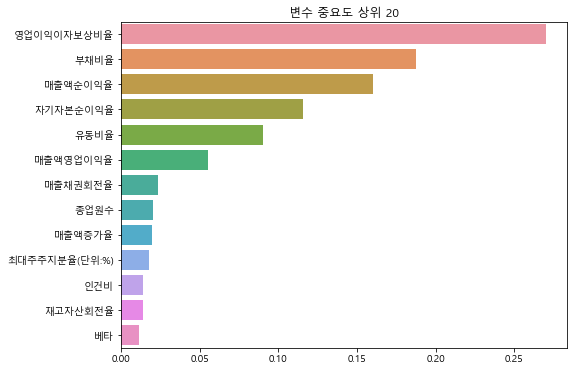

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('변수 중요도 상위 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

# GBM

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 156)

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9000
GBM 수행 시간: 2.0 초
